In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv(r"C:\Users\juwer\OneDrive\Desktop\Retails Project\Cleaned Data\sales_cleaned.csv")
products=pd.read_csv(r"C:\Users\juwer\OneDrive\Desktop\Retails Project\Cleaned Data\products_cleaned.csv")
customers=pd.read_csv(r"C:\Users\juwer\OneDrive\Desktop\Retails Project\Cleaned Data\customers_cleaned.csv")
returns=pd.read_csv(r"C:\Users\juwer\OneDrive\Desktop\Retails Project\Cleaned Data\returns_cleaned.csv")
stores=pd.read_csv(r"C:\Users\juwer\OneDrive\Desktop\Retails Project\Cleaned Data\stores_cleaned.csv")

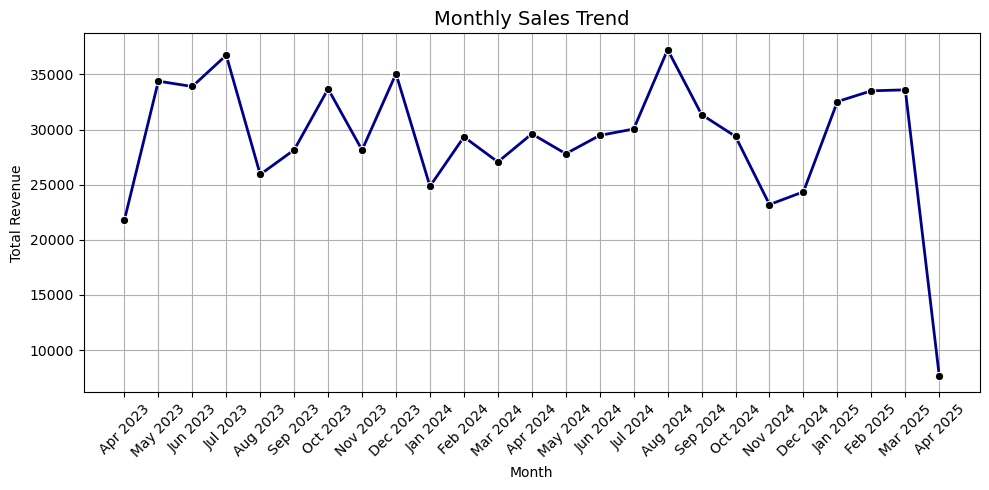

In [11]:
sales['Order_Date'] = pd.to_datetime(sales['Order_Date'], errors='coerce')
monthly_sales = sales.groupby(sales['Order_Date'].dt.to_period('M'))['Total_Amount'].sum().sort_index()

# Formatting index for display
monthly_sales.index = monthly_sales.index.strftime('%b %Y')

# Plotting of monthly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=2, color='darkblue', mfc='black')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend", fontsize=14)
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.grid()
plt.show()

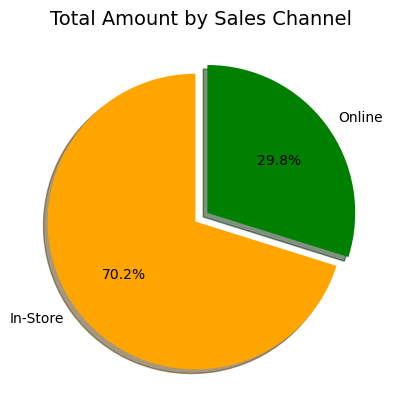

In [54]:
# Grouping and aggregating of total amount by sales channel
channel_sales = sales.groupby('Sales_Channel')['Total_Amount'].sum()
# total amount by sales channel
plt.figure()
explode = [0.05] * len(channel_sales)
plt.pie(channel_sales, labels=channel_sales.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'green'],explode=explode,shadow=True)
plt.title('Total Amount by Sales Channel', fontsize=14)
plt.show()

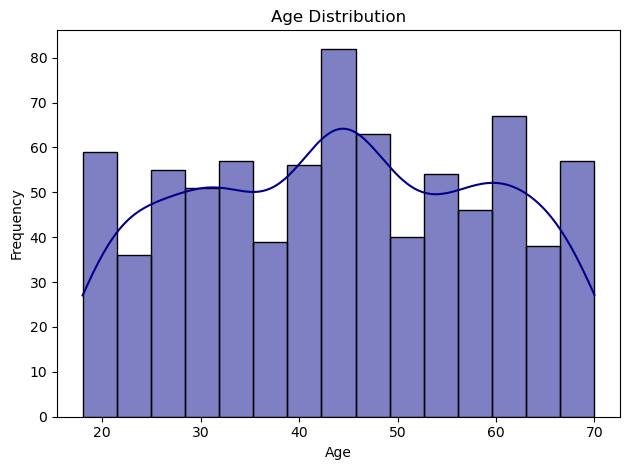

In [65]:
#  Age Distribution
sns.histplot(customers['Age'], bins=15, kde=True, color='darkblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

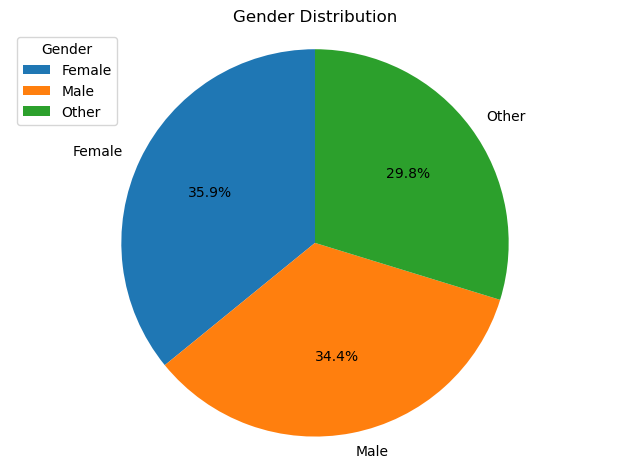

In [56]:
# Gender Distribution
gender_counts = customers['Gender'].value_counts()

plt.figure()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.tight_layout()
plt.legend(title='Gender')
plt.show()


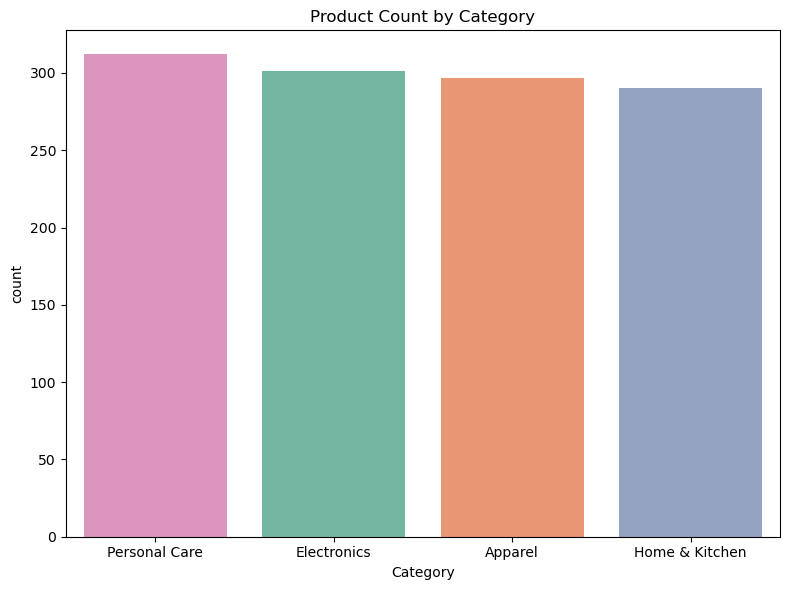

In [59]:
# Category count
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category', order=products['Category'].value_counts().index,hue='Category', palette='Set2')
plt.title('Product Count by Category')
plt.tight_layout()
plt.show()

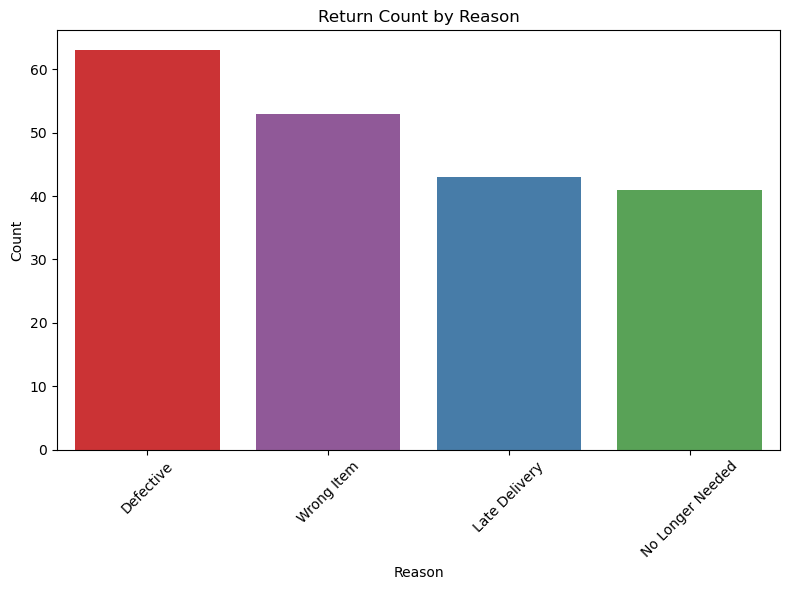

In [58]:
# Return reason by count
plt.figure(figsize=(8, 6))
sns.countplot(data=returns, x='Return_Reason', order=returns['Return_Reason'].value_counts().index,hue='Return_Reason', palette='Set1')
plt.title('Return Count by Reason')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

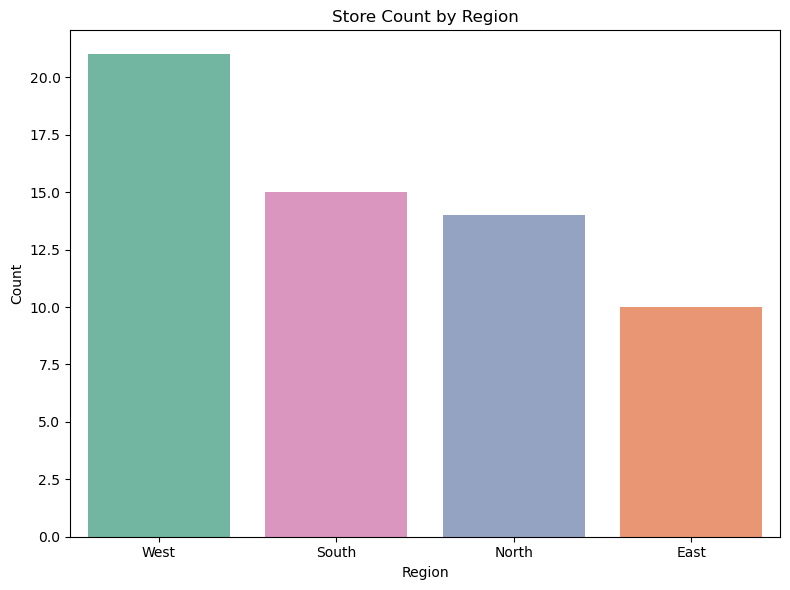

In [60]:
# Store count by region
plt.figure(figsize=(8, 6))
sns.countplot(data=stores, x='Region', order=stores['Region'].value_counts().index, hue='Region', palette='Set2')
plt.title('Store Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()